In [39]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = '/content/customer_churn.csv'
df = pd.read_csv(data)

df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [3]:
# Checking for any missing or null value
df.isnull().sum()

,0
Names,0
Age,0
Total_Purchase,0
Account_Manager,0
Years,0
Num_Sites,0
Onboard_date,0
Location,0
Company,0
Churn,0


In [4]:
# Describing the dataset
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [5]:
# Checking the columns of our dataset
df.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [38]:
# Data processing
# Dropping unnacessary columns: Names, Location, Company

df_cleaned = df.drop(['Names', 'Location', 'Company'], axis=1)

# Convert 'Onboard_date' to datetime format and calculate customer tenure in years
df_cleaned['Onboard_date'] = pd.to_datetime(df_cleaned['Onboard_date'])
df_cleaned['Tenure'] = (pd.to_datetime('today') - df_cleaned['Onboard_date']).dt.days / 365

#Drop Onboard date
df_cleaned = df_cleaned.drop('Onboard_date', axis=1)

#Check for any missing value in the cleaned data
missing_values = df_cleaned.isnull().sum()
df_cleaned.describe(), missing_values

(              Age  Total_Purchase  Account_Manager       Years   Num_Sites  \
 count  900.000000      900.000000       900.000000  900.000000  900.000000   
 mean    41.816667    10062.824033         0.481111    5.273156    8.587778   
 std      6.127560     2408.644532         0.499921    1.274449    1.764836   
 min     22.000000      100.000000         0.000000    1.000000    3.000000   
 25%     38.000000     8497.122500         0.000000    4.450000    7.000000   
 50%     42.000000    10045.870000         0.000000    5.215000    8.000000   
 75%     46.000000    11760.105000         1.000000    6.110000   10.000000   
 max     65.000000    18026.010000         1.000000    9.150000   14.000000   
 
             Churn      Tenure  
 count  900.000000  900.000000  
 mean     0.166667   13.540231  
 std      0.372885    3.210684  
 min      0.000000    7.821918  
 25%      0.000000   10.689726  
 50%      0.000000   13.632877  
 75%      0.000000   16.408904  
 max      1.000000   18

In [7]:
#Splitting the data into features x and target y

x = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

# Standardize numerica features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Chesk the shape of the train & test sets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((720, 6), (180, 6), (720,), (180,))

# Using Logistic Regression

Confusion Matrix:



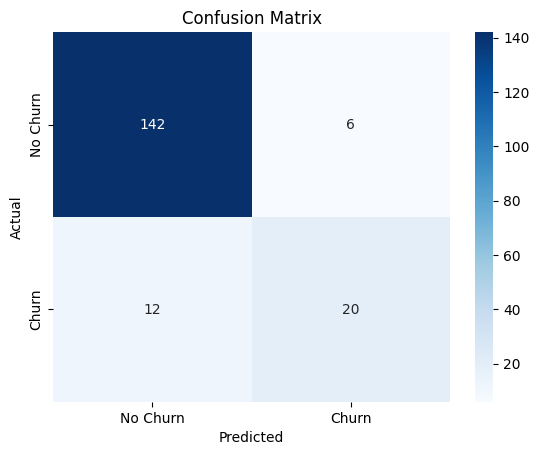

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       148
           1       0.77      0.62      0.69        32

    accuracy                           0.90       180
   macro avg       0.85      0.79      0.82       180
weighted avg       0.89      0.90      0.90       180



In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = log_model.predict(x_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")

# Create a heatmap for better visualization
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

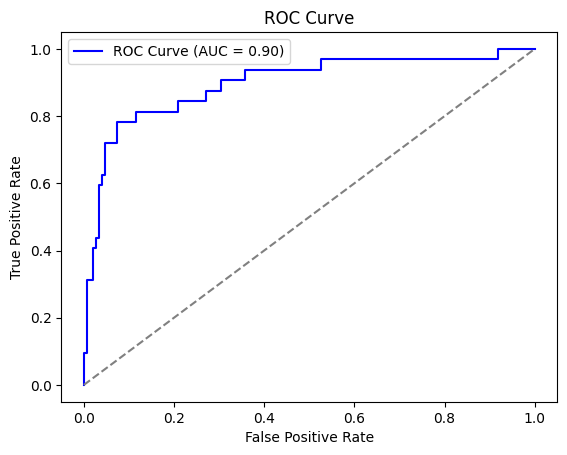

AUC Score: 0.90


In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities
y_probs = log_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Print AUC Score
print(f"AUC Score: {auc:.2f}")

custom_threshold = 0.4
custom_churn_predictions = (y_probs >= custom_threshold).astype(int)

In [14]:
importance = pd.DataFrame({
    'Feature': df_cleaned.drop(columns=['Churn']).columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(importance)


           Feature  Coefficient
4        Num_Sites     2.114723
3            Years     0.643406
0              Age     0.286894
2  Account_Manager     0.266268
1   Total_Purchase     0.076323
5           Tenure     0.074137


In [15]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and values to test
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Retrain model with best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)

# Evaluate again
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Best Score: 0.8930555555555555
Optimized Model Accuracy: 0.9


###  Predictions on new dataset

In [17]:
# I'm using the same dataset for the predictions by dropping the churn values
new_data = df.drop('Churn', axis=1)

# Assuming 'new_data' is a DataFrame with the same structure as the original dataset
new_data_cleaned = new_data.drop(columns=['Names', 'Location', 'Company'])

# Convert 'Onboard_date' to datetime and calculate tenure
new_data_cleaned['Onboard_date'] = pd.to_datetime(new_data_cleaned['Onboard_date'])
new_data_cleaned['Tenure'] = (pd.to_datetime('today') - new_data_cleaned['Onboard_date']).dt.days / 365

# Drop 'Onboard_date'
new_data_cleaned = new_data_cleaned.drop(columns=['Onboard_date'])

# Scale the new data using the same scaler fitted on the training data
new_data_scaled = scaler.transform(new_data_cleaned)


In [65]:
# Predict churn (1 for churn, 0 for no churn)
churn_predictions = log_model.predict(new_data_scaled)

# Printing predictions
print("Predicted Churn (1 = churn, 0 = no churn):\n", churn_predictions)


Predicted Churn (1 = churn, 0 = no churn):
 [0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1
 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1
 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1
 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0

In [19]:
df.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [20]:
print(df['Churn'][3])

1


In [35]:
x = len(df['Churn'])
x

900

In [36]:
for i in range(10):
  if df['Churn'][i] == churn_predictions[i]:
    print('Correct')
  else:
    print('Wrong')

Wrong
Correct
Correct
Wrong
Wrong
Wrong
Correct
Wrong
Correct
Correct


# Decision Tree Classifier

COnfusion matrix:



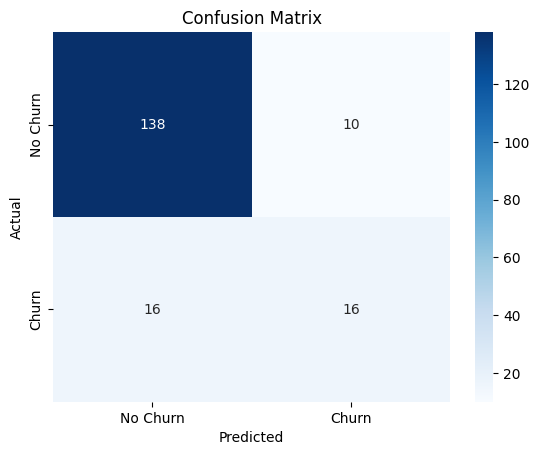

Decision Tree Accuracy: 0.8555555555555555
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       148
           1       0.62      0.50      0.55        32

    accuracy                           0.86       180
   macro avg       0.76      0.72      0.73       180
weighted avg       0.85      0.86      0.85       180



In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_tree)
print('COnfusion matrix:\n')

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

In [55]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Logistic Regression Accuracy: 0.9
Decision Tree Accuracy: 0.8555555555555555
Gradient Boosting Accuracy: 0.8888888888888888


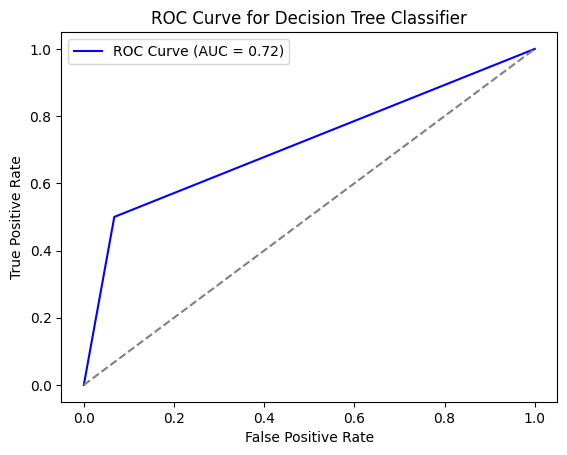

AUC Score for Decision Tree: 0.72


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Train the Decision Tree model (if not already done)
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)

# Step 2: Get predicted probabilities for the positive class (churn = 1)
y_probs_tree = tree_model.predict_proba(x_test)[:, 1]  # Get probability for class 1 (churn)

# Step 3: Compute ROC curve and AUC score
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_probs_tree)
auc_tree = roc_auc_score(y_test, y_probs_tree)

# Step 4: Plot the ROC curve
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='blue', label=f"ROC Curve (AUC = {auc_tree:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend()
plt.show()

# Step 5: Print AUC Score
print(f"AUC Score for Decision Tree: {auc_tree:.2f}")


In [63]:
tree_importance = pd.DataFrame({
    'Feature': df_cleaned.drop(columns=['Churn']).columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Decision Tree Feature Importance:\n", tree_importance)

Decision Tree Feature Importance:
            Feature  Importance
4        Num_Sites    0.384394
3            Years    0.195413
5           Tenure    0.151194
1   Total_Purchase    0.142613
0              Age    0.112068
2  Account_Manager    0.014319


In [67]:
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters and values to test for Decision Tree
param_grid_tree = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Decision Tree
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)
print("Best Score for Decision Tree:", grid_search_tree.best_score_)

# Retrain model with best parameters
best_tree_model = grid_search_tree.best_estimator_
y_pred_best_tree = best_tree_model.predict(x_test)

# Evaluate again
print("Optimized Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_best_tree))


Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score for Decision Tree: 0.8972222222222221
Optimized Decision Tree Model Accuracy: 0.8777777777777778


In [69]:
# Assuming the new_data has been preprocessed and scaled similarly to training data
churn_predictions_tree = best_tree_model.predict(new_data_scaled)

# Print predictions for Decision Tree
print("Predicted Churn (1 = churn, 0 = no churn) - Decision Tree:\n", churn_predictions_tree)


Predicted Churn (1 = churn, 0 = no churn) - Decision Tree:
 [0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1
 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1
 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

In [71]:
for i in range(10):
  if df['Churn'][i] == churn_predictions_tree[i]:
    print('Correct')
  else:
    print('Wrong')

Wrong
Correct
Correct
Wrong
Wrong
Wrong
Correct
Wrong
Correct
Correct


# Gradient Boosting Classifier

Confusion Matrix:



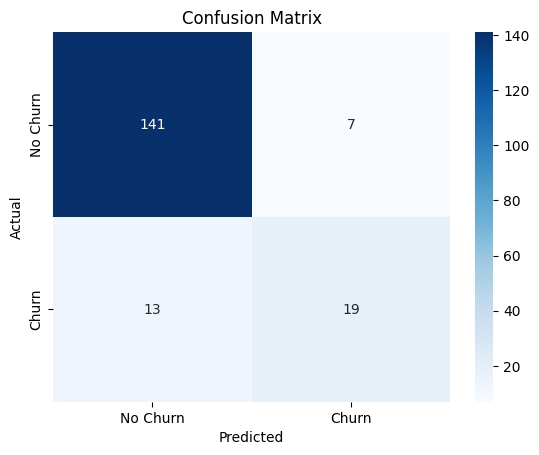

Gradient Boosting Accuracy: 0.8888888888888888
Confusion Matrix:
 [[141   7]
 [ 13  19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       148
           1       0.73      0.59      0.66        32

    accuracy                           0.89       180
   macro avg       0.82      0.77      0.79       180
weighted avg       0.88      0.89      0.88       180



In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(x_test)

conf1_matrix = confusion_matrix(y_test, y_pred_gb)
print('Confusion Matrix:\n')

sns.heatmap(conf1_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

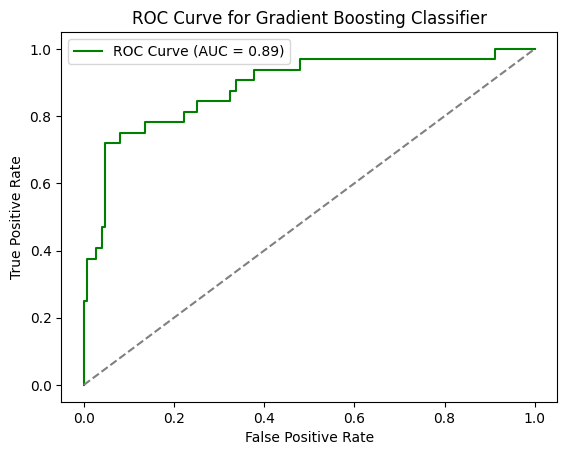

AUC Score for Gradient Boosting: 0.89


In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Train the Gradient Boosting model (if not already done)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train, y_train)

# Step 2: Get predicted probabilities for the positive class (churn = 1)
y_probs_gb = gb_model.predict_proba(x_test)[:, 1]  # Get probability for class 1 (churn)

# Step 3: Compute ROC curve and AUC score
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_probs_gb)
auc_gb = roc_auc_score(y_test, y_probs_gb)

# Step 4: Plot the ROC curve
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='green', label=f"ROC Curve (AUC = {auc_gb:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.legend()
plt.show()

# Step 5: Print AUC Score
print(f"AUC Score for Gradient Boosting: {auc_gb:.2f}")


In [64]:
gb_importance = pd.DataFrame({
    'Feature': df_cleaned.drop(columns=['Churn']).columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Gradient Boosting Feature Importance:\n", gb_importance)

Gradient Boosting Feature Importance:
            Feature  Importance
4        Num_Sites    0.551715
3            Years    0.205193
1   Total_Purchase    0.108436
5           Tenure    0.068880
0              Age    0.042016
2  Account_Manager    0.023760


In [68]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameters and values to test for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Score for Gradient Boosting:", grid_search_gb.best_score_)

# Retrain model with best parameters
best_gb_model = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_model.predict(x_test)

# Evaluate again
print("Optimized Gradient Boosting Model Accuracy:", accuracy_score(y_test, y_pred_best_gb))


Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Score for Gradient Boosting: 0.8902777777777778
Optimized Gradient Boosting Model Accuracy: 0.8888888888888888


In [70]:
# Predict churn using the best Gradient Boosting model
churn_predictions_gb = best_gb_model.predict(new_data_scaled)

# Print predictions for Gradient Boosting
print("Predicted Churn (1 = churn, 0 = no churn) - Gradient Boosting:\n", churn_predictions_gb)


Predicted Churn (1 = churn, 0 = no churn) - Gradient Boosting:
 [0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1
 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0

In [72]:
for i in range(10):
  if df['Churn'][i] == churn_predictions_gb[i]:
    print('Correct')
  else:
    print('Wrong')

Wrong
Correct
Correct
Wrong
Wrong
Wrong
Correct
Wrong
Correct
Correct


In [53]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Logistic Regression Accuracy: 0.9
Decision Tree Accuracy: 0.8555555555555555
Gradient Boosting Accuracy: 0.8888888888888888
